In [1]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import os
import numpy as np
import torch.utils.data as Data
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim


# Load Dataset

In [2]:
transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 8

trainset = torchvision.datasets.SVHN('./data', split='train',download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)



testset = torchvision.datasets.SVHN('./data', split='test',download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


In [3]:
imgs = torch.stack([img_t for img_t ,_ in trainset],dim=3)
imgs.shape

torch.Size([3, 32, 32, 73257])

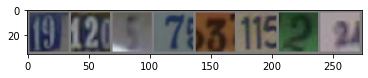

In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'' for j in range(batch_size)))


# Define a Convolutional Neural Network

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()



# Compare the accuracy achieved by rectified linear units , sigmoid units and tanh units in the CNN.

In [6]:
input_size=32*32*3
output_size=10
epochs = 10

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

net_acc=[]
for epoch in range(epochs):  # loop over the dataset multiple times
    
    net.train()
    running_loss = 0.0
    test_accs = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
    
        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
   
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = net(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc=correct / total
    net_acc.append(acc)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.246
[1,  4000] loss: 2.222
[1,  6000] loss: 1.672
[1,  8000] loss: 0.800
Accuracy of the network on the 10000 test images: 77 %
[2,  2000] loss: 0.594
[2,  4000] loss: 0.549
[2,  6000] loss: 0.503
[2,  8000] loss: 0.497
Accuracy of the network on the 10000 test images: 84 %
[3,  2000] loss: 0.434
[3,  4000] loss: 0.429
[3,  6000] loss: 0.412
[3,  8000] loss: 0.396
Accuracy of the network on the 10000 test images: 85 %
[4,  2000] loss: 0.369
[4,  4000] loss: 0.355
[4,  6000] loss: 0.376
[4,  8000] loss: 0.356
Accuracy of the network on the 10000 test images: 87 %
[5,  2000] loss: 0.316
[5,  4000] loss: 0.332
[5,  6000] loss: 0.328
[5,  8000] loss: 0.323
Accuracy of the network on the 10000 test images: 87 %
[6,  2000] loss: 0.291
[6,  4000] loss: 0.294
[6,  6000] loss: 0.305
[6,  8000] loss: 0.290
Accuracy of the network on the 10000 test images: 88 %
[7,  2000] loss: 0.263
[7,  4000] loss: 0.270
[7,  6000] loss: 0.282
[7,  8000] loss: 0.275
Accuracy of the network on

In [9]:
class Snet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.sigmoid(self.conv1(x)))
        x = self.pool(F.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x


snet = Snet()

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(snet.parameters(), lr=0.001, momentum=0.9)

snet_acc=[]
for epoch in range(epochs):  # loop over the dataset multiple times
   
    snet.train()
    running_loss = 0.0
    test_accs = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
      
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = snet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    

    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = snet(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc=correct / total
    snet_acc.append(acc)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[1,  2000] loss: 2.249
[1,  4000] loss: 2.240
[1,  6000] loss: 2.239
[1,  8000] loss: 2.243
Accuracy of the network on the 10000 test images: 19 %
[2,  2000] loss: 2.243
[2,  4000] loss: 2.242
[2,  6000] loss: 2.241
[2,  8000] loss: 2.239
Accuracy of the network on the 10000 test images: 19 %
[3,  2000] loss: 2.237
[3,  4000] loss: 2.241
[3,  6000] loss: 2.241
[3,  8000] loss: 2.246
Accuracy of the network on the 10000 test images: 19 %
[4,  2000] loss: 2.241
[4,  4000] loss: 2.233
[4,  6000] loss: 2.239
[4,  8000] loss: 2.241
Accuracy of the network on the 10000 test images: 19 %
[5,  2000] loss: 2.238
[5,  4000] loss: 2.235
[5,  6000] loss: 2.238
[5,  8000] loss: 2.245
Accuracy of the network on the 10000 test images: 19 %
[6,  2000] loss: 2.240
[6,  4000] loss: 2.236
[6,  6000] loss: 2.239
[6,  8000] loss: 2.239
Accuracy of the network on the 10000 test images: 19 %
[7,  2000] loss: 2.242
[7,  4000] loss: 2.234
[7,  6000] loss: 2.242
[7,  8000] loss: 2.240
Accuracy of the network on

In [33]:
class TAnet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.tanh(self.conv1(x)))
        x = self.pool(F.tanh(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return x


tanet = TAnet()

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(tanet.parameters(), lr=0.001, momentum=0.9)

tanet_acc=[]
for epoch in range(epochs):  # loop over the dataset multiple times
   
    tanet.train()
    running_loss = 0.0
    test_accs = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
      
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = tanet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    

    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = tanet(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc=correct / total
    tanet_acc.append(acc)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


[1,  2000] loss: 2.241
[1,  4000] loss: 2.132
[1,  6000] loss: 1.566
[1,  8000] loss: 1.078
Accuracy of the network on the 10000 test images: 70 %
[2,  2000] loss: 0.819
[2,  4000] loss: 0.766
[2,  6000] loss: 0.701
[2,  8000] loss: 0.668
Accuracy of the network on the 10000 test images: 77 %
[3,  2000] loss: 0.604
[3,  4000] loss: 0.605
[3,  6000] loss: 0.573
[3,  8000] loss: 0.581
Accuracy of the network on the 10000 test images: 80 %
[4,  2000] loss: 0.560
[4,  4000] loss: 0.527
[4,  6000] loss: 0.519
[4,  8000] loss: 0.515
Accuracy of the network on the 10000 test images: 80 %
[5,  2000] loss: 0.497
[5,  4000] loss: 0.482
[5,  6000] loss: 0.493
[5,  8000] loss: 0.479
Accuracy of the network on the 10000 test images: 82 %
[6,  2000] loss: 0.445
[6,  4000] loss: 0.466
[6,  6000] loss: 0.471
[6,  8000] loss: 0.471
Accuracy of the network on the 10000 test images: 82 %
[7,  2000] loss: 0.437
[7,  4000] loss: 0.446
[7,  6000] loss: 0.436
[7,  8000] loss: 0.445
Accuracy of the network on

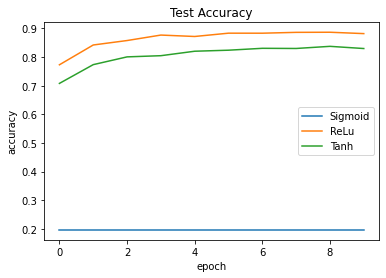

In [35]:
plt.plot(snet_acc,label=f"Sigmoid")
plt.plot(net_acc,label=f"ReLu")
plt.plot(tanet_acc,label=f"Tanh")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Test Accuracy')
plt.legend()
plt.show()

# Compare the accuracy achieved by different batch size.

CNN with batch size = 16

In [12]:
transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16

trainset = torchvision.datasets.SVHN('./data', split='train',download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)



testset = torchvision.datasets.SVHN('./data', split='test',download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


In [13]:
import torch.nn as nn
import torch.nn.functional as F


class BNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


bnet = BNet()


In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(bnet.parameters(), lr=0.001, momentum=0.9)

bnet_acc=[]
for epoch in range(epochs):  # loop over the dataset multiple times
    
    bnet.train()
    running_loss = 0.0
    test_accs = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
    
        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = bnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
   
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = bnet(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc=correct / total
    bnet_acc.append(acc)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.245
[1,  4000] loss: 2.223
Accuracy of the network on the 10000 test images: 37 %
[2,  2000] loss: 1.317
[2,  4000] loss: 0.744
Accuracy of the network on the 10000 test images: 81 %
[3,  2000] loss: 0.549
[3,  4000] loss: 0.498
Accuracy of the network on the 10000 test images: 84 %
[4,  2000] loss: 0.441
[4,  4000] loss: 0.423
Accuracy of the network on the 10000 test images: 86 %
[5,  2000] loss: 0.370
[5,  4000] loss: 0.389
Accuracy of the network on the 10000 test images: 87 %
[6,  2000] loss: 0.345
[6,  4000] loss: 0.348
Accuracy of the network on the 10000 test images: 87 %
[7,  2000] loss: 0.317
[7,  4000] loss: 0.328
Accuracy of the network on the 10000 test images: 87 %
[8,  2000] loss: 0.292
[8,  4000] loss: 0.309
Accuracy of the network on the 10000 test images: 87 %
[9,  2000] loss: 0.285
[9,  4000] loss: 0.282
Accuracy of the network on the 10000 test images: 88 %
[10,  2000] loss: 0.257
[10,  4000] loss: 0.268
Accuracy of the network on the 10000 test i

 CNN with batch size = 4

In [15]:
transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.SVHN('./data', split='train',download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)



testset = torchvision.datasets.SVHN('./data', split='test',download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


In [16]:
import torch.nn as nn
import torch.nn.functional as F


class B_Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


b_net = B_Net()


In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(b_net.parameters(), lr=0.001, momentum=0.9)

b_net_acc=[]
for epoch in range(epochs):  # loop over the dataset multiple times
    
    b_net.train()
    running_loss = 0.0
    test_accs = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
    
        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = b_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
   
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = b_net(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc=correct / total
    b_net_acc.append(acc)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.246
[1,  4000] loss: 2.209
[1,  6000] loss: 1.829
[1,  8000] loss: 1.034
[1, 10000] loss: 0.731
[1, 12000] loss: 0.615
[1, 14000] loss: 0.610
[1, 16000] loss: 0.552
[1, 18000] loss: 0.525
Accuracy of the network on the 10000 test images: 82 %
[2,  2000] loss: 0.462
[2,  4000] loss: 0.493
[2,  6000] loss: 0.459
[2,  8000] loss: 0.445
[2, 10000] loss: 0.470
[2, 12000] loss: 0.423
[2, 14000] loss: 0.443
[2, 16000] loss: 0.441
[2, 18000] loss: 0.409
Accuracy of the network on the 10000 test images: 86 %
[3,  2000] loss: 0.370
[3,  4000] loss: 0.385
[3,  6000] loss: 0.389
[3,  8000] loss: 0.366
[3, 10000] loss: 0.374
[3, 12000] loss: 0.368
[3, 14000] loss: 0.370
[3, 16000] loss: 0.362
[3, 18000] loss: 0.359
Accuracy of the network on the 10000 test images: 86 %
[4,  2000] loss: 0.323
[4,  4000] loss: 0.327
[4,  6000] loss: 0.320
[4,  8000] loss: 0.329
[4, 10000] loss: 0.329
[4, 12000] loss: 0.331
[4, 14000] loss: 0.337
[4, 16000] loss: 0.328
[4, 18000] loss: 0.322
Accurac

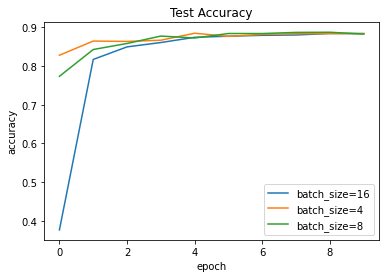

In [31]:
plt.plot(bnet_acc,label=f"batch_size=16")
plt.plot(b_net_acc,label=f"batch_size=4")
plt.plot(net_acc,label=f"batch_size=8")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Test Accuracy')
plt.legend()
plt.show()

# Compare the accuracy achieved by different transform.

Use flip 

In [19]:
transform = transforms.Compose([
                    transforms.RandomHorizontalFlip(), 
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 8

trainset = torchvision.datasets.SVHN('./data', split='train',download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)



testset = torchvision.datasets.SVHN('./data', split='test',download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


In [20]:
import torch.nn as nn
import torch.nn.functional as F


class TNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


tnet = TNet()


In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(tnet.parameters(), lr=0.001, momentum=0.9)

tnet_acc=[]
for epoch in range(epochs):  # loop over the dataset multiple times
    
    tnet.train()
    running_loss = 0.0
    test_accs = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
    
        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = tnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
   
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = tnet(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc=correct / total
    tnet_acc.append(acc)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.245
[1,  4000] loss: 2.212
[1,  6000] loss: 1.807
[1,  8000] loss: 1.133
Accuracy of the network on the 10000 test images: 71 %
[2,  2000] loss: 0.818
[2,  4000] loss: 0.746
[2,  6000] loss: 0.685
[2,  8000] loss: 0.633
Accuracy of the network on the 10000 test images: 79 %
[3,  2000] loss: 0.574
[3,  4000] loss: 0.542
[3,  6000] loss: 0.536
[3,  8000] loss: 0.515
Accuracy of the network on the 10000 test images: 81 %
[4,  2000] loss: 0.482
[4,  4000] loss: 0.483
[4,  6000] loss: 0.476
[4,  8000] loss: 0.474
Accuracy of the network on the 10000 test images: 83 %
[5,  2000] loss: 0.443
[5,  4000] loss: 0.436
[5,  6000] loss: 0.435
[5,  8000] loss: 0.438
Accuracy of the network on the 10000 test images: 84 %
[6,  2000] loss: 0.397
[6,  4000] loss: 0.411
[6,  6000] loss: 0.405
[6,  8000] loss: 0.409
Accuracy of the network on the 10000 test images: 84 %
[7,  2000] loss: 0.381
[7,  4000] loss: 0.386
[7,  6000] loss: 0.387
[7,  8000] loss: 0.388
Accuracy of the network on

Use flip and rotation

In [25]:
transform2 = transforms.Compose(
    [transforms.RandomRotation(2),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [26]:
class RTNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


rtnet = RTNet()


In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(rtnet.parameters(), lr=0.001, momentum=0.9)

rtnet_acc=[]
for epoch in range(epochs):  # loop over the dataset multiple times
    
    rtnet.train()
    running_loss = 0.0
    test_accs = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
    
        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = rtnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    
   
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
        # calculate outputs by running images through the network
            outputs = rtnet(images)
        # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc=correct / total
    rtnet_acc.append(acc)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.247
[1,  4000] loss: 2.235
[1,  6000] loss: 2.120
[1,  8000] loss: 1.422
Accuracy of the network on the 10000 test images: 67 %
[2,  2000] loss: 0.882
[2,  4000] loss: 0.789
[2,  6000] loss: 0.732
[2,  8000] loss: 0.670
Accuracy of the network on the 10000 test images: 77 %
[3,  2000] loss: 0.612
[3,  4000] loss: 0.585
[3,  6000] loss: 0.582
[3,  8000] loss: 0.557
Accuracy of the network on the 10000 test images: 81 %
[4,  2000] loss: 0.518
[4,  4000] loss: 0.512
[4,  6000] loss: 0.500
[4,  8000] loss: 0.484
Accuracy of the network on the 10000 test images: 82 %
[5,  2000] loss: 0.463
[5,  4000] loss: 0.452
[5,  6000] loss: 0.455
[5,  8000] loss: 0.449
Accuracy of the network on the 10000 test images: 84 %
[6,  2000] loss: 0.415
[6,  4000] loss: 0.415
[6,  6000] loss: 0.443
[6,  8000] loss: 0.414
Accuracy of the network on the 10000 test images: 84 %
[7,  2000] loss: 0.384
[7,  4000] loss: 0.389
[7,  6000] loss: 0.402
[7,  8000] loss: 0.412
Accuracy of the network on

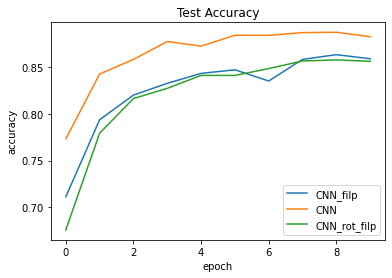

In [32]:
plt.plot(tnet_acc,label=f"CNN_filp")
plt.plot(net_acc,label=f"CNN")
plt.plot(rtnet_acc,label=f"CNN_rot_filp")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Test Accuracy')
plt.legend()
plt.show()